In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:
# set path

path = r'C:\Users\Josh Wattay\anaconda3\ClimateWins Analysis\01 - Data'

In [3]:
# import weather station data

df_weather = pd.read_csv(os.path.join(path, 'weather_data.csv'))

In [4]:
#import pleasant weather data

df_pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'))

In [5]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dropping Columns for GDANSK ROMA and TOURS due to these stations not having the required amount of data.

In [7]:
# Drop columns with insufficient data

df_weather = df_weather.drop(columns=[col for col in df_weather.columns if any(keyword in col for keyword in ['GDANSK', 'ROMA', 'TOURS'])])

In [8]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [10]:
#Create an 'X' and y df by dropping the unneeded columns.

X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'],axis=1)

In [11]:
#Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [12]:
# shape of training and test sets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [13]:
# verify type as DataFrame

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
#converting X_test and X_train dataframes to numpy array

X_test = np.array(X_test) 
X_train = np.array(X_train)

# Artificial Neural Network (hereinafter "ANN")

## I will be scaling the data for the ANN because it will improve the accuracy of the model and also help it converge faster.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-5.91328577e-01 -2.21146040e-02  8.23854234e-01 ...  9.62409617e-01
   1.17829312e+00  6.39480244e-01]
 [ 1.07091991e+00 -1.27558298e+00  1.18467534e+00 ... -3.07111726e-03
   1.29767264e-03  1.90767993e-03]
 [-1.75766456e-01 -2.21146040e-02  6.43443684e-01 ...  1.56583508e+00
   1.99945273e+00  8.71324812e-01]
 ...
 [ 2.39795665e-01  2.56433925e-01  1.36508589e+00 ... -1.48146349e+00
  -1.88736944e+00 -7.80567739e-01]
 [ 1.07091991e+00 -2.21146040e-02  1.09447006e+00 ...  6.30525615e-01
   2.47645557e-01  9.58266526e-01]
 [ 1.07091991e+00 -2.21146040e-02  7.33648959e-01 ... -9.68551851e-01
  -9.01977903e-01 -8.09548310e-01]]


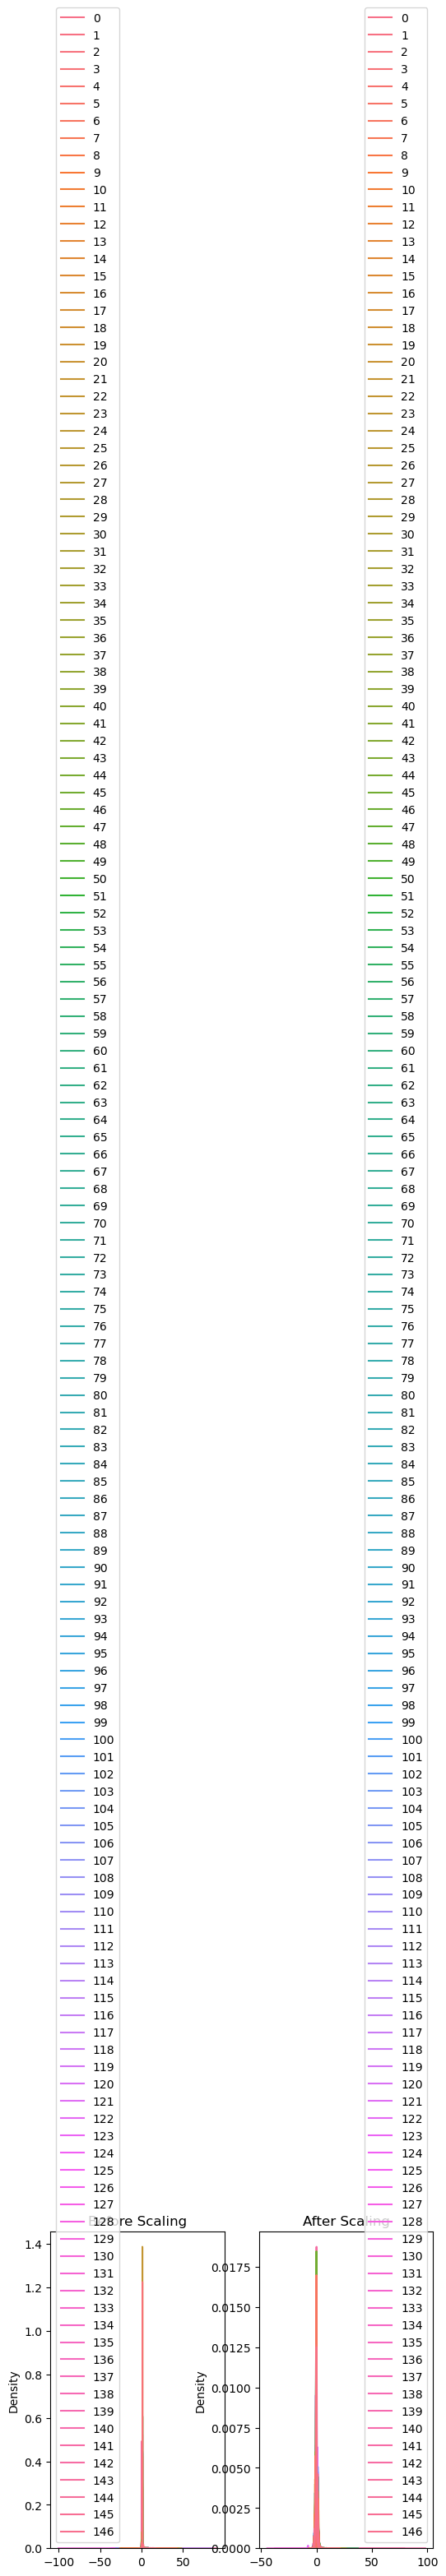

In [16]:
#Show scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

#Create the ANN

#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

In [35]:
# First Scenario

mlp = MLPClassifier(hidden_layer_sizes=(15, 10, 5), max_iter=1000, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(15, 10, 5), max_iter=1000, tol=1e-05)

# Second Scenario

mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1500, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

#Third Scenario

mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=5000, tol=0.00000000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

#testing ANN accuracy #ANN MODEL 

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

## The ANN Model had a train accuracy of 44% and a test accuracy of 43% - far from ideal.

In [36]:
#testing ANN accuracy #First Scenario MODEL 

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5281780153381361
0.5163820146392472


## The First Scenario Model had a train accuracy of 53% and a test accuracy of 51% - step in the right direction.

#testing ANN accuracy #Second Scenario MODEL 

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

## The Second Scenario Model had a train accuracy of 54% and a test accuracy of 51% - almost identical to the first scenario.

#testing ANN accuracy #Third Scenario MODEL 

y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

## The Third Scenario Model had a train accuracy of 65% and a test accuracy of 56% - the best result thus far...but far from ideal.

In [37]:
# check shapes for plotting confusion matrices

print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


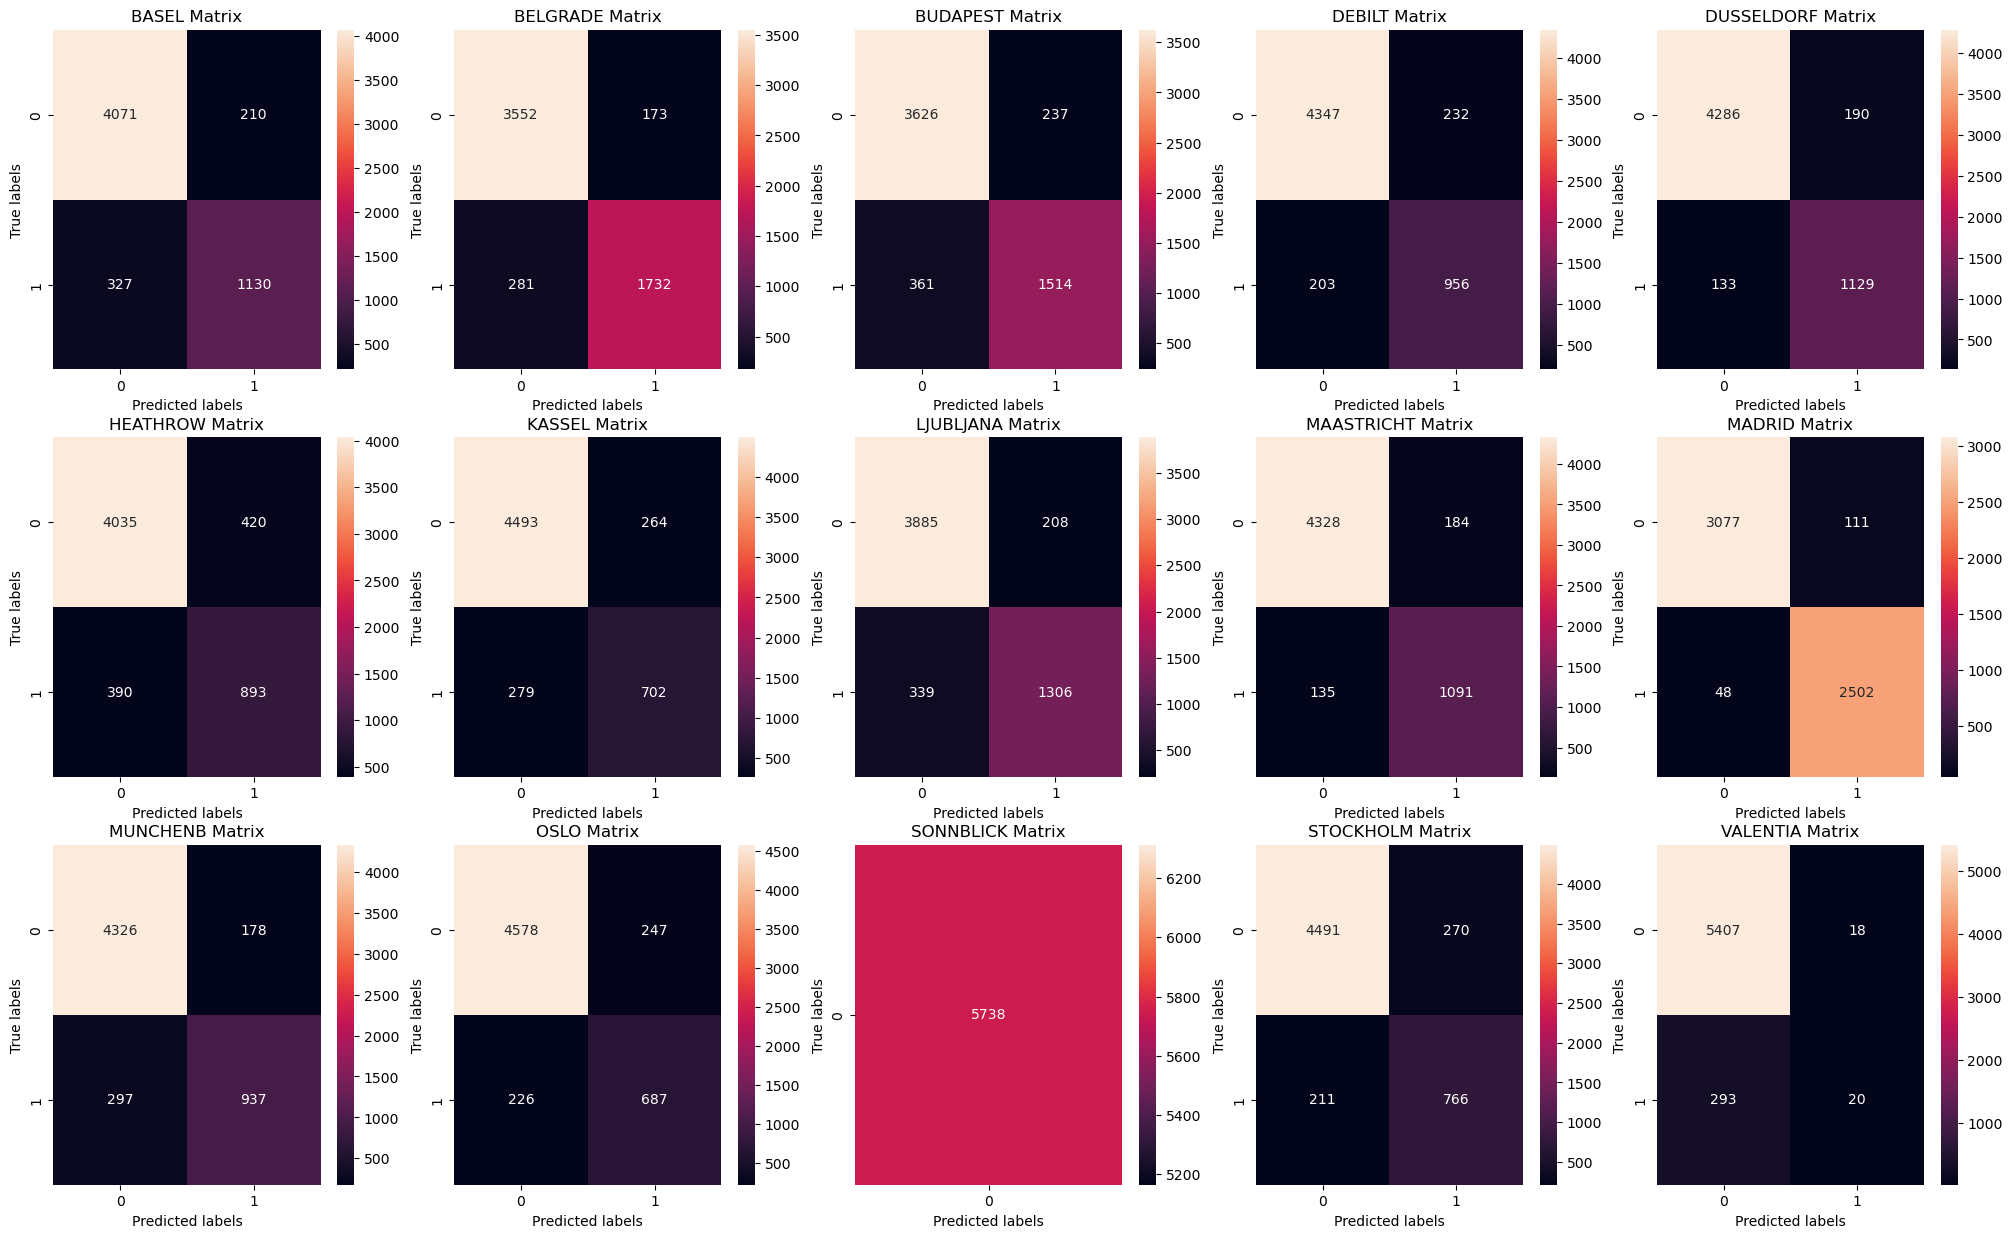

In [38]:
# Plot confusion matrix

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1